In [2]:
import yfinance as yf
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [3]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('DXG-Historical-Data.csv')

In [4]:
data['Time'] = np.arange(len(data.index))

In [5]:
data = data[::-1].reset_index(drop=True)
data['Price'] = data['Price'].str.replace(',', '').astype(float)

In [6]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Time
0,01/03/2017,6066.5,"6,191.4","6,191.4","6,041.6",494.17K,-2.80%,1799
1,01/04/2017,6166.4,"6,066.5","6,191.4","6,041.6",2.04M,1.65%,1798
2,01/05/2017,6091.5,"6,191.4","6,191.4","6,091.5",2.31M,-1.21%,1797
3,01/06/2017,6141.4,"6,141.4","6,291.2","6,141.4",4.07M,0.82%,1796
4,01/09/2017,6141.4,"6,141.4","6,266.3","6,141.4",2.86M,0.00%,1795
...,...,...,...,...,...,...,...,...
1795,03/14/2024,18100.0,"18,200.0","18,400.0","17,900.0",12.18M,-0.28%,4
1796,03/15/2024,18300.0,"18,100.0","18,850.0","18,100.0",29.13M,1.10%,3
1797,03/18/2024,19000.0,"18,450.0","19,300.0","18,200.0",36.19M,3.83%,2
1798,03/19/2024,18500.0,"19,200.0","19,300.0","18,500.0",11.64M,-2.63%,1


In [7]:
# Lấy dữ liệu cần phân tích
time_series_price = data['Price']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(7:3)
train_data_price_73 = time_series_price[:int(0.7*len(time_series_price))]
test_data_price_73 = time_series_price[int(0.7*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(8:2)
train_data_price_82 = time_series_price[:int(0.8*len(time_series_price))]
test_data_price_82 = time_series_price[int(0.8*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(9:1)
train_data_price_91 = time_series_price[:int(0.9*len(time_series_price))]
test_data_price_91 = time_series_price[int(0.9*len(time_series_price)):]

In [9]:
auto_arima(train_data_price_73, maxiter=100)

ARIMA(maxiter=100, order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
auto_arima(train_data_price_82, maxiter=100)

ARIMA(maxiter=100, order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
auto_arima(train_data_price_91, maxiter=100)

ARIMA(maxiter=100, order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 7:3
model = ARIMA(train_data_price_73, order=(1,1,0))
fit_model_73= model.fit()

# Dự đoán trên tập kiểm tra
predictions_73 = fit_model_73.forecast(steps=len(test_data_price_73))

# 8:2
model = ARIMA(train_data_price_82, order=(3,1,3))
fit_model_82= model.fit()

# Dự đoán trên tập kiểm tra
predictions_82 = fit_model_82.forecast(steps=len(test_data_price_82))

# 9:1
model = ARIMA(train_data_price_91, order=(2,1,2))
fit_model_91 = model.fit()

# Dự đoán trên tập kiểm tra
predictions_91 = fit_model_91.forecast(steps=len(test_data_price_91))

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


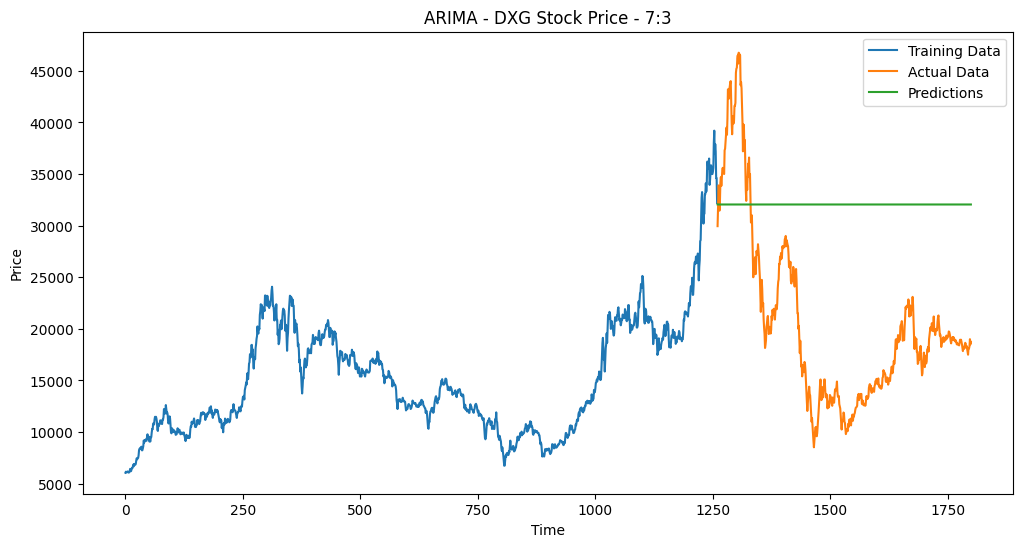

In [14]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_73, label='Training Data')
plt.plot(test_data_price_73.index, test_data_price_73, label='Actual Data')
plt.plot(test_data_price_73.index, predictions_73, label='Predictions')
plt.title('ARIMA - DXG Stock Price - 7:3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_73, predictions_73))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_73, predictions_73)

mape = mean_absolute_percentage_error(test_data_price_73, predictions_73)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 14307.256550561611
MAE: 13272.200924936722
MAPE: 83.39482182825512


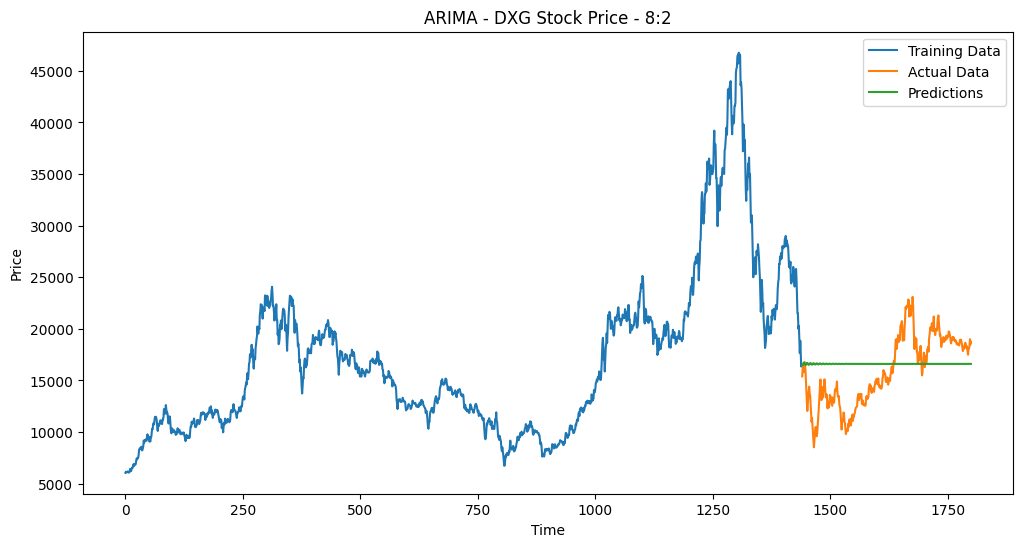

In [17]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_82, label='Training Data')
plt.plot(test_data_price_82.index, test_data_price_82, label='Actual Data')
plt.plot(test_data_price_82.index, predictions_82, label='Predictions')
plt.title('ARIMA - DXG Stock Price - 8:2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_82, predictions_82))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_82, predictions_82)

mape = mean_absolute_percentage_error(test_data_price_82, predictions_82)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 3410.3143437285853
MAE: 2971.967469156887
MAPE: 20.85333922032613


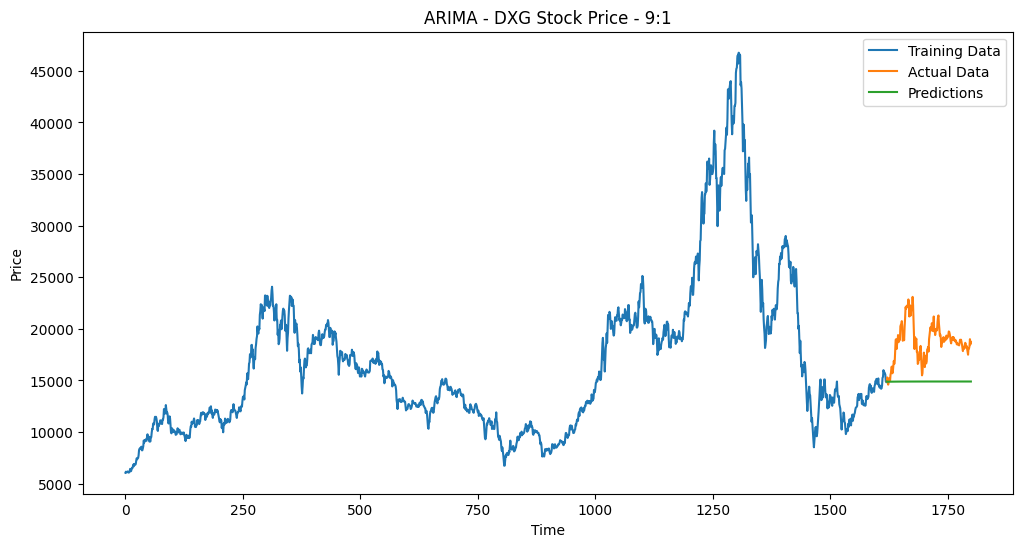

In [19]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_91, label='Training Data')
plt.plot(test_data_price_91.index, test_data_price_91, label='Actual Data')
plt.plot(test_data_price_91.index, predictions_91, label='Predictions')
plt.title('ARIMA - DXG Stock Price - 9:1')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_91, predictions_91))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_91, predictions_91)

mape = mean_absolute_percentage_error(test_data_price_91, predictions_91)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 4272.630405878504
MAE: 3904.4912055268846
MAPE: 20.071468648558803
